# Comparison: similarity-centric analogous cycles and birthtime similarity-centric analogous cycles

* The "birthtime similarity-centric analogous bars" differs from the default method in constructing the Witness complex.
* Given a selected Witness cycle, the "birthtime" version fixes the Witness complex at the birthtime of the cycle.
* In many of the simple datasets, the two methods produce comparable results.
* However, "birthtime" version sometimes won't find matches that should be there. This notebook provides an example.

### Data
* `V1`: orientation x location conjunctive neurons. (S1 x S1 x S1) In original data, there are 800 cells. We randomly selected 300 cells for computational speedup. 
* `O`: 64 orientation neurons (S1)


In [1]:
using Pkg
Pkg.activate("../../../env/.")

  Activating project at `~/analogous_neural/env`


In [2]:
include("../../../src/analogous_bars.jl")
include("../../../src/Eirene_var.jl")

WebIO._IJuliaInit()

Main.Eirene_var

In [3]:
using .analogous_bars
using .Eirene_var
using DelimitedFiles
using Printf
using HDF5
using Random
using Plots
using JLD
using StatsBase

# Load data
* 300 V1 cells have been randomly selected.

In [4]:
D_V1 = readdlm("dissimilarity_V1_sub.csv", ',', Float64)
D_O = readdlm("dissimilarity_orientation.csv", ',', Float64)
D_ori_V1 = readdlm("dissimilarity_orientation_V1sub.csv", ',', Float64);

# Compute persistence diagrams

In [5]:
dim = 1

# VR persistence
VR_V1 = eirene(D_V1, record = "all", maxdim = dim)
VR_O = eirene(D_O, record = "all", maxdim = dim);

# Compute Witness persistence 
W_ori_V1 = compute_Witness_persistence(D_ori_V1, maxdim = dim)

# get all barcodes
barcode_VR_V1 = barcode(VR_V1, dim = 1)
barcode_VR_O = barcode(VR_O, dim = 1)
barcode_W_ori_V1 = barcode(W_ori_V1["eirene_output"], dim = dim);


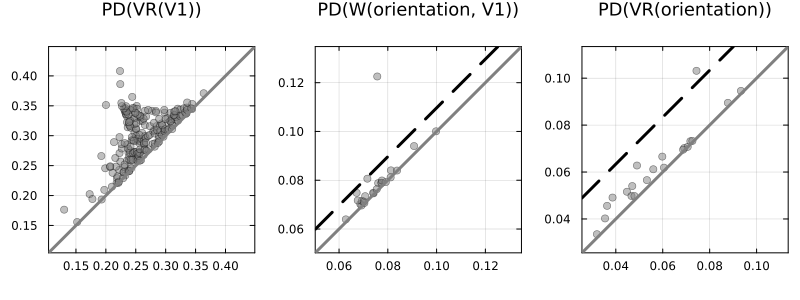

In [6]:
# plot all persistence diagrams 
p1 = plot_PD(barcode_VR_V1; title = "PD(VR(V1))", titlefontsize = 12)

selected_W_ori_V1, cutoff_W_ori_V1 = select_persistent_intervals_IQR(barcode_W_ori_V1)
p2 = plot_PD(barcode_W_ori_V1; cutoff = cutoff_W_ori_V1, title = "PD(W(orientation, V1))", titlefontsize = 12)

selected_ori, cutoff_ori = select_persistent_intervals_IQR(barcode_VR_O)
p3 = plot_PD(barcode_VR_O; cutoff = cutoff_ori, title = "PD(VR(orientation))", titlefontsize = 12)

p = plot(p1, p2, p3, layout = grid(1,3), size = (800, 300))
display(p)

# Run similarity-centric analogous bars

In [7]:
# select points in the Witness persistence
println("Selected points in the Witness PD: ", selected_W_ori_V1)

Selected points in the Witness PD: [24]


In [13]:
analogous_P, analogous_Q = analogous_bars.run_baseline_similarity_analogous(VR_P = VR_O,
                                                                            D_P = D_O,
                                                                            VR_Q = VR_V1,
                                                                            D_Q = D_V1,
                                                                            W_PQ = W_ori_V1,
                                                                            W_PQ_bars = selected_W_ori_V1,
                                                                            dim = 1);

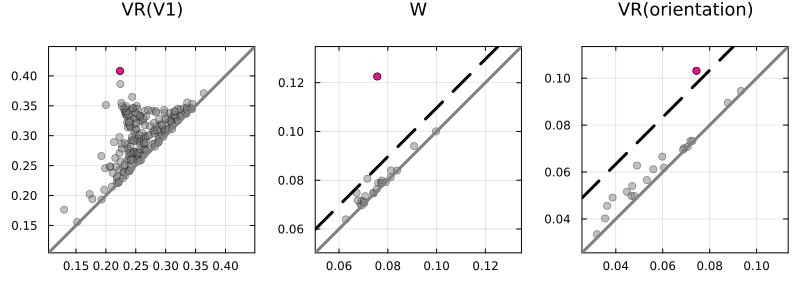

In [15]:
# select Witness feature
i = 24 # must be a member of `selected_W_ori_V1`

p1 = plot_PD(barcode_VR_V1; 
    highlight = analogous_Q[i]["baseline_bar_extension"],
    title = "VR(V1)", 
    titlefontsize = 12)
p2 = plot_PD(barcode_W_ori_V1; 
    highlight = [i],
    cutoff = cutoff_W_ori_V1, 
    title = "W", 
    titlefontsize = 12)
p3 = plot_PD(barcode_VR_O; 
    highlight = analogous_P[i]["baseline_bar_extension"],
    cutoff = cutoff_ori, 
    title = "VR(orientation)", 
    titlefontsize = 12)

plot(p1, p2, p3, layout = grid(1,3), size = (800, 300))

# Run birthtime similarity analogous cycles

In [8]:
extension_orientation, extension_V1 = analogous_bars.run_birthtime_baseline_similarity_analogous(VR_P = VR_O,
                                                                                D_P = D_O,
                                                                                VR_Q = VR_V1,
                                                                                D_Q = D_V1,
                                                                                W_PQ = W_ori_V1,
                                                                                W_PQ_bar = 24,
                                                                                dim = 1);

extension to P complete
computed Dowker dual
extension to Q complete


In [14]:
extension_V1

Dict{Any, Any} with 8 entries:
  "comparison"             => "W to VR"
  "epsilon_0"              => 0.466167
  "C_VR"                   => Dict{String, Any}("symmat"=>[38850 36725 … 22774 …
  "dim"                    => 1
  "C_W"                    => Dict{String, Any}("rv"=>Any[Int64[], [1, 2, 1, 3,…
  "selected_cycle"         => [[18, 237], [109, 116], [7, 97], [109, 196], [18,…
  "baseline_bar_extension" => nothing
  "C_auxiliary_filtration" => Dict{String, Any}("rv"=>Any[Int64[], [1, 6, 1, 11…

Note that there is no baseline bar extension to V1.

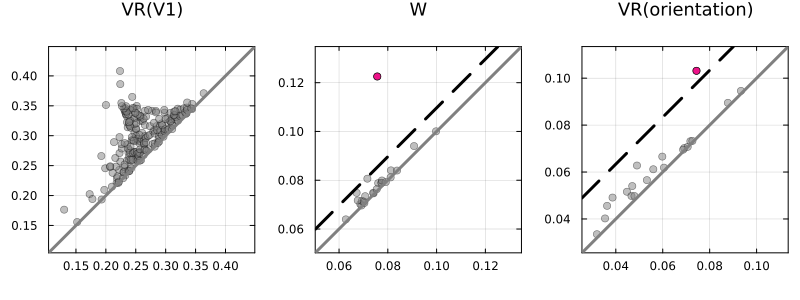

In [13]:
# select Witness feature
i = 24 # must be a member of `selected_W_ori_V1`

p1 = plot_PD(barcode_VR_V1; 
    title = "VR(V1)", 
    titlefontsize = 12)
p2 = plot_PD(barcode_W_ori_V1; 
    highlight = [i],
    cutoff = cutoff_W_ori_V1, 
    title = "W", 
    titlefontsize = 12)
p3 = plot_PD(barcode_VR_O; 
    highlight = extension_orientation["baseline_bar_extension"],
    cutoff = cutoff_ori, 
    title = "VR(orientation)", 
    titlefontsize = 12)

plot(p1, p2, p3, layout = grid(1,3), size = (800, 300))